In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [7]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=fsiclfqPM5x4smElHnLCCNxG6Nsdvm&access_type=offline


,id,joke,origin_id,culture,category,description,title,c1_name,c2_name,c1_gender,...,c1_2,c2_2,n_3,c1_3,c2_3,n_4,c1_4,c2_4,script_flow,image_id
9,1127.0,Why don't skeletons ride roller coasters? They...,8hFYojqz5h,General,icanhazdadjoke,Skeletons lack stomachs to enjoy roller coasters.,Skeleton's Ride,Bones,Skully,male,...,Let's do this!,"I don't know, Bones...",The roller coaster speeds down a steep drop.,Woooohoooo!,Ahhhhh!,"Bones gets off the roller coaster, holding his...",I think I'm gonna be sick...,"Told you, no stomach for it!","[n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...",N5cP8LknMHqFx6Cn


### Code 101&102: Generate Story and Images

In [8]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

Is there a hole in your shoe? No… Then how’d you get your foot in it?


In [9]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [12]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

# JS.convert_webp_to_png()

Success: Story Data Updated
1129
Success: Image Preprocessing
Success: New Docs Created
{'1129_BrokenWishes': '1J68xYjdg0IQEcQgbrCORVb4ZopKa4Jr2BpoINl3oqaE'}


### Code 104: SNS Messages

In [41]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1110_Remarkable!.json' and branch: 'main'
  - documentId: 1Trf512MaTj1XBUuW8dKuMVxE9lnR5byxR8LnKrwT1M4
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1111_Stega-snore-us.json' and branch: 'main'
  - documentId: 1dZkLBbC_-Z04psrblqCriUElqtVGsI4r5zFziyRZYkc
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1112_GasGag.json' and branch: 'main'
  - documentId: 1Y2Pxg0y4J-kDi2CVIFMojJ0xdkGB-vc39ukHOC00sVw
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. 

x

### Video Creation

In [47]:
# Define ids of video to be generated
ID_LIST = [i for i in range(1110, 1120)]
# Crop mode
CROP_MODE = 'auto'

In [48]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: CROP_MODE for id_ in ID_LIST})
clip.copy(exp_crop_mode)

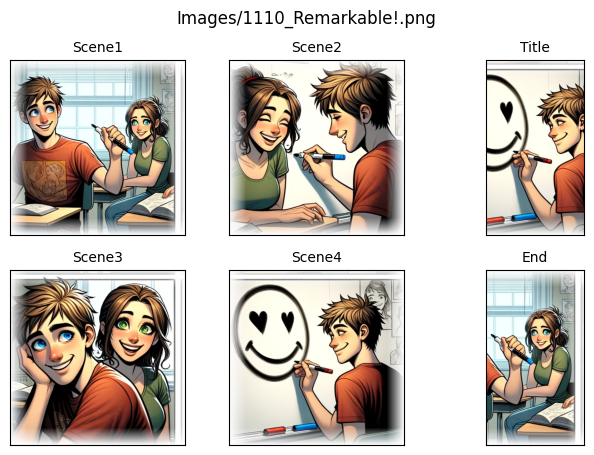

In [46]:
# Get list of image paths
args = [{'path': f"Images/{p}", 'mode': CROP_MODE} for p in os.listdir('Images') if int(p.split('_')[0]) in ID_LIST]

# Test image cropping
video.image_crop_test(args)

In [53]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here 'auto' or 'manual'
crop_mode = {1115: 'auto', 1116: 'auto', 1117: 'auto', 1118: 'auto', 1119: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=ID_LIST, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

1110_Remarkable! has already existed!
1111_Stega-snore-us has already existed!
1112_GasGag has already existed!
1113_Forest'sPassword has already existed!
1114_HandyTree has already existed!
Moviepy - Building video Videos/1115_MilkinaCarton.mp4.
MoviePy - Writing audio in 1115_MilkinaCartonTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1115_MilkinaCarton.mp4



Moviepy - Done !
Moviepy - video ready Videos/1115_MilkinaCarton.mp4
Moviepy - Building video Videos/1116_HokeyPokey.mp4.
MoviePy - Writing audio in 1116_HokeyPokeyTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1116_HokeyPokey.mp4



Moviepy - Done !
Moviepy - video ready Videos/1116_HokeyPokey.mp4
Moviepy - Building video Videos/1117_TicklishOctopus.mp4.
MoviePy - Writing audio in 1117_TicklishOctopusTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1117_TicklishOctopus.mp4



Moviepy - Done !
Moviepy - video ready Videos/1117_TicklishOctopus.mp4
Moviepy - Building video Videos/1118_DogWhistleConfusion.mp4.
MoviePy - Writing audio in 1118_DogWhistleConfusionTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1118_DogWhistleConfusion.mp4



Moviepy - Done !
Moviepy - video ready Videos/1118_DogWhistleConfusion.mp4
Moviepy - Building video Videos/1119_BathroomSymphony.mp4.
MoviePy - Writing audio in 1119_BathroomSymphonyTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1119_BathroomSymphony.mp4



Moviepy - Done !
Moviepy - video ready Videos/1119_BathroomSymphony.mp4
['1115_MilkinaCarton', '1116_HokeyPokey', '1117_TicklishOctopus', '1118_DogWhistleConfusion', '1119_BathroomSymphony']


### Video Schedule Post

In [55]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [58]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


,Title,Content,Path,Schedule
0,Joke Story: Remarkable!,\n### Video Description\n\nThis hilarious vide...,Videos/1110_Remarkable!.mp4,2024-06-03T12:00:00Z
1,Joke Story: Stega-snore-us,\n### Video Description\n\nJoin Toby and Dina ...,Videos/1111_Stega-snore-us.mp4,2024-06-03T13:00:00Z
2,Joke Story: Gas Gag,\n### Video Description\n\nLaugh out loud with...,Videos/1112_GasGag.mp4,2024-06-04T12:00:00Z
3,Joke Story: Forest's Password,\n### Video Description\n\nJoin Tom and Jenny ...,Videos/1113_Forest'sPassword.mp4,2024-06-04T13:00:00Z
4,Joke Story: Handy Tree,\n### Video Description\n\nJoin Jake and Liz a...,Videos/1114_HandyTree.mp4,2024-06-05T12:00:00Z
5,Joke Story: Milkina Carton,\n### Video Description\n\nLaugh along with Da...,Videos/1115_MilkinaCarton.mp4,2024-06-05T13:00:00Z
6,Joke Story: Hokey Pokey,\n### Video Description\n\nJoin Alex and Sam a...,Videos/1116_HokeyPokey.mp4,2024-06-06T12:00:00Z
7,Joke Story: Ticklish Octopus,\n### Video Description\n\nJoin Diver Dan and ...,Videos/1117_TicklishOctopus.mp4,2024-06-06T13:00:00Z
8,Joke Story: Dog Whistle Confusion,\n### Video Description\n\nJoin Dad and Mom as...,Videos/1118_DogWhistleConfusion.mp4,2024-06-07T12:00:00Z
9,Joke Story: Bathroom Symphony,\n### Video Description\n\nJoin Tom and Jerry ...,Videos/1119_BathroomSymphony.mp4,2024-06-07T13:00:00Z


In [3]:

v_titles = ['Joke Story: Hokey Pokey', 'Joke Story: Ticklish Octopus', 'Joke Story: Dog Whistle Confusion', 'Joke Story: Bathroom Symphony']
v_contents = ['\n### Video Description\n\nJoin Alex and Sam as they laugh about the hokey pokey! Watch their fun moment and enjoy the humor. Perfect for a quick laugh and some playful fun! 😂🕺 #HokeyPokeyJokes #AlexAndSam #Comedy #PlayfulFun\n\n🏫 **English Explanation** 🗣️:\n1. **Hokey Pokey**: A playful dance where you move parts of your body in and out.\n2. **Laugh**: To make sounds and movements that show you are happy or amused.\n3. **Fun Moment**: A brief period filled with enjoyment and laughter.\n4. **Playful**: Full of fun and high spirits.\n5. **Dance Move**: A specific movement or series of movements that form part of a dance.\n\n### Hashtags\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n\n', '\n### Video Description\n\nJoin Diver Dan and Olly the Octopus in a hilarious ticklish adventure! Watch as Dan tries to tickle Olly and they both burst into laughter. Perfect for ocean lovers and comedy fans! 😂🐙 #TicklishOctopus #DiverDan #Comedy #OceanFun\n\n🏫 **English Explanation** 🗣️:\n1. **Tickle**: To touch someone lightly to make them laugh.\n2. **Laugh**: To make sounds and movements that show you are happy or amused.\n3. **Adventure**: An exciting or unusual experience.\n4. **Ocean Lover**: A person who loves and enjoys the ocean and marine life.\n5. **Burst into Laughter**: To suddenly start laughing loudly.\n\n### Hashtags\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n\n', '\n### Video Description\n\nJoin Dad and Mom as they hilariously discuss dog whistles! Watch their funny moment and learn why humans can’t hear high frequencies but dogs can. Perfect for a quick laugh and family fun! 😂🐕 #DogWhistleJokes #DadAndMom #Comedy #FamilyFun\n\n🏫 **English Explanation** 🗣️:\n1. **Dog Whistle**: A high-frequency whistle that dogs can hear but humans can’t.\n2. **Laugh**: To make sounds and movements that show you are happy or amused.\n3. **High Frequencies**: Sounds that are at the higher end of the audio spectrum.\n4. **Curiosity**: A strong desire to know or learn something.\n5. **Family Fun**: Activities that provide enjoyment and entertainment for all family members.\n\n### Hashtags\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n\n', '\n### Video Description\n\nJoin Tom and Jerry in this hilarious bathroom symphony! Watch as Tom discovers a tuba next to the sink and they both share a laugh. Perfect for a quick laugh and some musical fun! 😂🎶 #BathroomSymphony #TomAndJerry #Comedy #MusicalFun\n\n🏫 **English Explanation** 🗣️:\n1. **Tuba**: A large brass musical instrument with a deep sound.\n2. **Toothbrush**: A small brush used for cleaning teeth.\n3. **Laugh**: To make sounds and movements that show you are happy or amused.\n4. **Symphony**: A long piece of music usually played by an orchestra.\n5. **Musical Fun**: Enjoyment derived from playing or listening to music.\n\n### Hashtags\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n\n']
v_tags = [{}, {}, {}, {}]
v_paths = ['Videos/1116_HokeyPokey.mp4', 'Videos/1117_TicklishOctopus.mp4', 'Videos/1118_DogWhistleConfusion.mp4', 'Videos/1119_BathroomSymphony.mp4']
v_schedules = ['2024-06-06T12:00:00Z', '2024-06-06T13:00:00Z', '2024-06-07T12:00:00Z', '2024-06-07T13:00:00Z']



In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': 'dPG0OX2mAzM'}
{'status': 'success', 'videoId': 'WeY3otps9ao'}
{'status': 'success', 'videoId': 'vxgc2GGjPwg'}
{'status': 'success', 'videoId': 'Hzhlp6W73T8'}


In [60]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Hokey Pokey', 'Joke Story: Ticklish Octopus', 'Joke Story: Dog Whistle Confusion', 'Joke Story: Bathroom Symphony']
v_contents = ['\n### Video Description\n\nJoin Alex and Sam as they laugh about the hokey pokey! Watch their fun moment and enjoy the humor. Perfect for a quick laugh and some playful fun! 😂🕺 #HokeyPokeyJokes #AlexAndSam #Comedy #PlayfulFun\n\n🏫 **English Explanation** 🗣️:\n1. **Hokey Pokey**: A playful dance where you move parts of your body in and out.\n2. **Laugh**: To make sounds and movements that show you are happy or amused.\n3. **Fun Moment**: A brief period filled with enjoyment and laughter.\n4. **Playful**: Full of fun and high spirits.\n5. **Dance Move**: A specific movement or series of movements that form part of a dance.\n\n### Hashtags\n#shorts #LearnEnglish #StudyEnglish #Humor #Funny #Joke #ShortStory #1min #Anglais #AprenderInglés #ingles #英語学習 #英語 #学英语 #英语学习 #영어학습지\n\n', '\n### Video Description\n\nJoin Diver Dan and Olly the 

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

,id,culture,category,joke
185,185,General,Valentine,What's a chocolate's favorite kind of music on...
186,186,General,Valentine,Why was the chocolate box nervous on Valentine...
187,187,General,Valentine,How do chocolates stay fit for Valentine's Day...
188,188,General,Valentine,What did the chocolate say to the Valentine's ...
189,189,General,Valentine,Why did the chocolate give his girlfriend a bo...


In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

,id,culture,category,joke
157,157,General,Observational humor,Isn't it funny how we never see snowmen at the...
158,158,General,Wordplay jokes,"If April showers bring May flowers, what do Ma..."
159,159,General,Animal jokes,Why don’t polar bears get married in winter? B...
160,160,General,Doctor jokes,Why do doctors make the worst snowmen? Because...
161,161,General,Technology jokes,Why did the smartphone wear a scarf? Because i...


In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs